In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

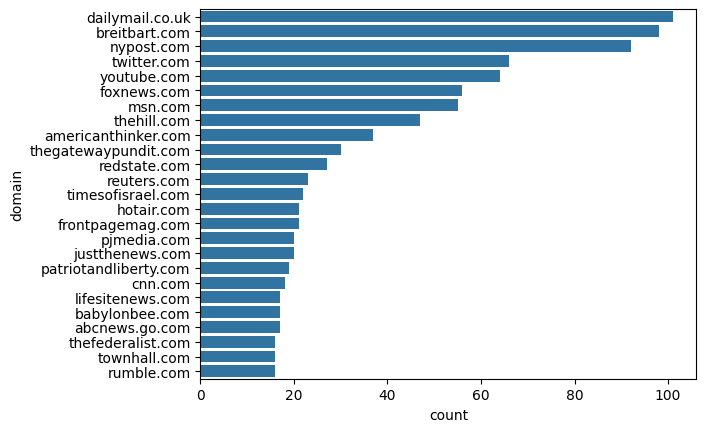

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

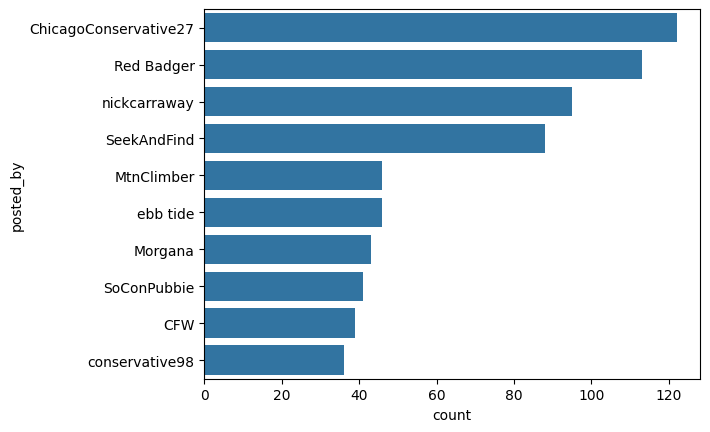

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_31821/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain         \
                                            count unique   
domain               posted_by                             
abcnews.go.com       Red Badger                 2      1   
                     nickcarraway               2      1   
americanthinker.com  MtnClimber                20      1   
                     SeekAndFind               13      1   
breitbart.com        ChicagoConservative27     55      1   
                     Morgana                    1      1   
                     SoConPubbie                9      1   
                     conservative98             3      1   
cnn.com              nickcarraway               1      1   
dailymail.co.uk      Red Badger                 5      1   
                     Morgana                   17      1   
                     conservative98             1      1   
foxnews.com          Red Badger                 1      1   
                     nickcarraway               2      1   
                     ChicagoConservative27      4      1   
                     conservative98             5      1   
                     CFW                        2      1   
frontpagemag.com     Red Badger                 1      1   
                     MtnClimber                 3      1   
hotair.com           SeekAndFind               16      1   
justthenews.com      Red Badger                 6      1   
                     conservative98             1      1   
                     CFW                        6      1   
lifesitenews.com     SeekAndFind                1      1   
                     ebb tide                  15      1   
msn.com              SeekAndFind                1      1   
                     ChicagoConservative27      1      1   
nypost.com           Red Badger                 3      1   
                     nickcarraway              23      1   
                     MtnClimber                 1      1   
                     ChicagoConservative27     23      1   
                     CFW                        2      1   
pjmedia.com          SeekAndFind                9      1   
                     CFW                        1      1   
redstate.com         Red Badger                 1      1   
                     SeekAndFind               15      1   
                     CFW                        2      1   
reuters.com          Red Badger                 1      1   
rumble.com           Red Badger                 2      1   
thefederalist.com    SeekAndFind                4      1   
                     CFW                        2      1   
thegatewaypundit.com Red Badger                 2      1   
                     SoConPubbie                2      1   
thehill.com          Red Badger                 1      1   
                     ChicagoConservative27     32      1   
timesofisrael.com    Red Badger                 3      1   
townhall.com         SeekAndFind                4      1   
twitter.com          Red Badger                 3      1   
                     conservative98             2      1   
youtube.com          Red Badger                 2      1   
                     MtnClimber                 1      1   
                     Morgana                    4      1   

                                                                       
                                                             top freq  
domain               posted_by                                         
abcnews.go.com       Red Badger                   abcnews.go.com    2  
                     nickcarraway                 abcnews.go.com    2  
americanthinker.com  MtnClimber              americanthinker.com   20  
                     SeekAndFind             americanthinker.com   13  
breitbart.com        ChicagoConservative27         breitbart.com   55  
                     Morgana                       breitbart.com    1  
                     SoConPubbie                   breitbart.com    9  
                     c

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_31821/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
"'Sea of bodies' in Israel, scores dead in Gaza as shock Hamas attack unleashes war",2023-10-07 22:47:08,234.0
